**Enunciats**  
- Nivell 1
  1. Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.  

- Nivell 2  
  2. Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.  

- Nivell 3  
  3. Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**Dades:**  
Abans de començar a treballar amb les dades he volgut revisar les variables incloses. Alguns dels termes són molt específics no només del Hockey Gel , sino de la competició NHL en sí. és per això que he cregut edient incloure algunes defnicions que ens ajudaran a prendre decissions:

**Nom i breu descripció:**
- year: Year (2005-06 listed as "2005")  
- lgID: League ID  
- tmID: Team ID  
- franchID: Franchise ID  
- confID: Conference ID (see abbrev.csv for details)  
- divID: Division ID (see abbrev.csv for details)  
- rank: Final standing  
- playoff: Playoff result (see abbrev.csv for details)  
- G: Games  
- W: Wins  
- L: Losses  
- T: Ties  
- OTL: Overtime losses  
- Pts: Points  
- SoW: Shootout wins  
- SoL: Shootout losses  
- GF: Goals for  
- GA: Goals against  
- name: Full team name  
- PIM: Penalty minutes  
- BenchMinor: Bench minors (minutes)  
- PPG: Power play goals  
- PPC: Power play chances  
- SHA: Shorthanded goals against  
- PKG: Power play goals against  
- PKC: Penalty kill chances  
- SHF: Shorthanded goals for  


**Terminologia Específica:**

**Shootout**: When a game is still tied after overtime, which is five minutes, it goes to a shootout. This involves three hand-picked players from each team to alternate penalty shots at the opposing team’s goalie. The team with the most goals wins. If it is still a tie after the initial three, they continue with sudden death penalty shots, alternately, until a goal is scored. 

**Penalty Minutes (PIM):** The Statistic used to track the penalties was called Penalty Infraction Minutes, althought the team Penalty Minutes has become more common. **Penalty minutes** represent the total assessed length of penalities each player or team has accrued.  

**BENCH MINOR:** A "BENCH MINOR" penalty involves the removal from the ice of one player of the Team against which the penalty is assessed for a period of two (2) minutes.  

**Power Play:** a team is said to be on a power play when at least one opposing player is serving a penalty, and the team has a numerical advantage on the ice (whenever both teams have the same number of players on the ice, there is no power play).  

**Shorthanded Goal:** A goal scored by a Club while it is at a manpower disadvantage. The same cases apply for shorthand as for power-play goals, but in the opposite manner.  
**Penalty Kill:** Play where the player's team has fewer players on the ice than their opponent due to penalties. Includes 4v5, 3v4, 3v5, as well as when teams have pulled the goalie to turn 4v5 into 5v5 or 4v6, 3v4 into 4v4 or 3v5, and 3v5 into 4v5 or 3v6.  

Dit això, **comencem**!  

### Preparació:

In [1]:
import pandas as pd 
hockey = pd.read_csv('dades/Teams.csv')
hockey.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
hockey.shape

(1519, 27)

In [3]:
hockey.dtypes

year            int64
lgID           object
tmID           object
franchID       object
confID         object
divID          object
rank            int64
playoff        object
G               int64
W               int64
L               int64
T             float64
OTL           float64
Pts             int64
SoW           float64
SoL           float64
GF              int64
GA              int64
name           object
PIM           float64
BenchMinor    float64
PPG           float64
PPC           float64
SHA           float64
PKG           float64
PKC           float64
SHF           float64
dtype: object

In [4]:
hockey.describe()

,year,rank,G,W,L,T,OTL,Pts,SoW,SoL,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1309.000000,358.000000,1519.000000,210.000000,210.000000,1519.000000,1519.000000,1409.000000,1028.000000,1101.000000,1100.000000,1101.000000,1101.000000,1100.000000,1101.000000
mean,1974.527979,3.219223,69.518104,30.872284,29.113891,9.020626,7.460894,71.276498,5.419048,5.419048,218.764977,218.764977,1139.860185,15.740272,62.803815,332.540000,8.753860,62.803815,332.626364,8.746594
std,28.708711,1.667720,19.699843,12.061197,11.234513,4.970282,3.610191,26.277603,2.561328,2.192990,77.905094,79.168426,503.841236,7.545232,16.540408,66.880887,3.921305,16.989719,69.423922,4.518477
min,1909.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,8.000000,2.000000,0.000000,16.000000,107.000000,0.000000,24.000000,130.000000,0.000000
25%,1957.000000,2.000000,70.000000,22.000000,21.500000,6.000000,5.000000,54.000000,4.000000,4.000000,176.000000,173.500000,823.000000,10.000000,51.000000,283.000000,6.000000,51.000000,279.750000,6.000000
50%,1981.000000,3.000000,80.000000,32.000000,29.000000,9.000000,7.000000,75.000000,5.000000,5.000000,227.000000,228.000000,1114.000000,16.000000,61.000000,331.000000,8.000000,61.000000,330.000000,8.000000
75%,1998.000000,4.000000,82.000000,40.000000,37.000000,12.000000,10.000000,91.000000,7.000000,7.000000,273.500000,276.000000,1463.000000,20.000000,74.000000,375.000000,11.000000,74.000000,381.000000,11.000000
max,2011.000000,10.000000,84.000000,62.000000,71.000000,24.000000,18.000000,132.000000,15.000000,12.000000,446.000000,446.000000,2713.000000,56.000000,119.000000,541.000000,22.000000,122.000000,550.000000,36.000000


In [5]:
categorical = hockey.dtypes[hockey.dtypes == 'object'].index
hockey[categorical].describe()

,lgID,tmID,franchID,confID,divID,playoff,name
count,1519,1519,1519,902,1171,936,1519
unique,5,115,65,4,17,24,103
top,NHL,MTL,MTL,EC,PT,CQF,Montreal Canadiens
freq,1325,94,102,261,101,144,101


Després de revisar totes les dades, els enunciats dels exercicis, i fer vàries probes, crec q no necessitaré totes les dades. 
Em vull centrar en avaluar els punts obtinguts pels diferents equips. 
Per això crearé un nou DF més petit i fàcil de treballar.


In [6]:
df = pd.read_csv('dades/Teams.csv', usecols=['name','Pts'] )
df = pd.DataFrame(df[['name','Pts']])
df.head()

,name,Pts
0,Cobalt Silver Kings,8
1,Haileybury Hockey Club,8
2,Les Canadiens,4
3,Montreal Shamrocks,7
4,Montreal Wanderers,22


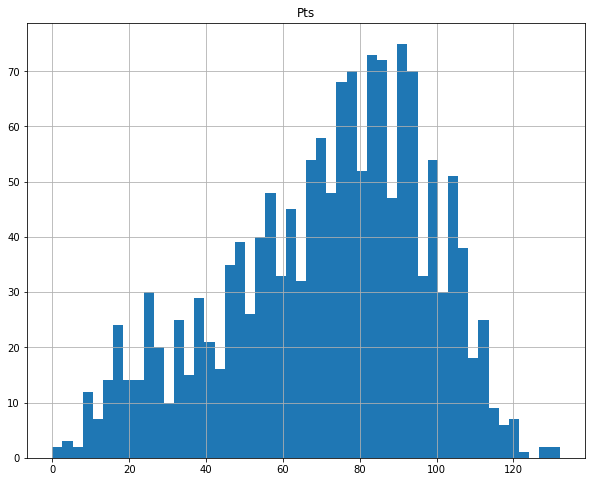

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,8))

plt.show()

In [8]:
df.describe()

,Pts
count,1519.000000
mean,71.276498
std,26.277603
min,0.000000
25%,54.000000
50%,75.000000
75%,91.000000
max,132.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1519 non-null   object
 1   Pts     1519 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.9+ KB


Un dels equips que vull fer servir en els exercicis, és el Chicago BlackHawks, he vist q té dos noms diferents, els igualaré pq no em distorsioni les dades.

In [10]:
df.name.unique()

array(['Cobalt Silver Kings', 'Haileybury Hockey Club', 'Les Canadiens',
       'Montreal Shamrocks', 'Montreal Wanderers', 'Ottawa Senators',
       'Renfrew Creamery Kings', 'Montreal Canadiens', 'Quebec Bulldogs',
       'New Westminster Royals', 'Victoria Aristocrats',
       'Vancouver Millionaires', 'Toronto Blueshirts',
       'Toronto Tecumsehs', 'Toronto Ontarios',
       'Toronto Ontarios/Shamrocks', 'Portland Rosebuds',
       'Seattle Metropolitans', '228th Battalion', 'Spokane Canaries',
       'Toronto Arenas', 'Toronto St. Patricks', 'Hamilton Tigers',
       'Calgary Tigers', 'Edmonton Eskimos', 'Regina Capitals',
       'Saskatoon/Moose Jaw Sheiks', 'Vancouver Maroons',
       'Victoria Cougars', 'Saskatoon Crescents', 'Boston Bruins',
       'Montreal Maroons', 'Saskatoon Sheiks', 'New York Americans',
       'Pittsburgh Pirates', 'Chicago Black Hawks', 'Detroit Cougars',
       'New York Rangers', 'Toronto Maple Leafs', 'Detroit Falcons',
       'Philadelphia Quakers

In [11]:
df.loc[(df.name == 'Chicago Black Hawks'), 'name'] = 'Chicago Blackhawks'

# Exercici 1:  
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. He triat la variable Punts Marcats. 
Calcula el p-valor.  
Rebutja la hipòtesi nul·la agafant un alfa de 5%.

Un dels meus equips preferits són els Boston Bruins, he decidit fer un subset de les dades d'aquest equip per tal de fer els exercicis.

La meva Hipòtesi és que els Boston Bruins fan per temporada més punts que la mitjana dels equips.  

${H_{0}}$ : Boston Bruins ${\mu}$ = Hockey ${\mu}$  
${H_{1}}$  : Boston Bruins ${\mu}$ > Hockey ${\mu}$
Per això dividiré el DataFrame:

In [18]:
bostonBruins = df[df['name']=='Boston Bruins']
noBB = df[df['name']!='Boston Bruins']
bostonBruins.Pts.describe().round(3)

count     87.000
mean      75.966
std       24.071
min       12.000
25%       57.500
50%       74.000
75%       96.500
max      121.000
Name: Pts, dtype: float64

In [13]:
noBB.Pts.describe().round(3)

count    1432.000
mean       70.992
std        26.387
min         0.000
25%        53.750
50%        76.000
75%        91.000
max       132.000
Name: Pts, dtype: float64

## Analisi

### amb Z test

In [14]:
#Z test

import statsmodels.stats.weightstats as ws

col1 = ws.DescrStatsW(bostonBruins['Pts'])
col2 = ws.DescrStatsW(noBB['Pts'])

cm_obj = ws.CompareMeans(col1, col2)

zstat, z_pval = cm_obj.ztest_ind(usevar='unequal')

print('z stats: ', zstat.round(4),' z_p-val: ', z_pval.round(4))

z stats:  1.8606  z_p-val:  0.0628


### amb t-test

In [15]:
# t test
import numpy as np
from scipy import stats
 
stats.ttest_1samp(a= bostonBruins.Pts, popmean= noBB.Pts.mean())

Ttest_1sampResult(statistic=1.9273309712329223, pvalue=0.057239625361603146)

Text(0.5, 1.0, 'Z test')

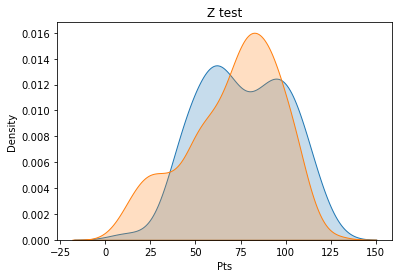

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(bostonBruins.Pts, shade=True)
sns.kdeplot(noBB.Pts, shade=True)
plt.title("Z test")

Les p-value dels dos test ens fan pensar que podem descartar la Hipotesi nula i dir que la mitja de punts de l'equi p seleccionat és més gran q la mitja de la resta d'equips.

# Exercici  2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Per fer aquest exercici compararé les dades dels Boston Bruins amb un altre equip, els Chicago Black Hawks. Però seguiré un altre procés. Faré un independent t-test fent servir la llibreria Reserachpy.

In [19]:
Blackhawks = df[df['name']=='Chicago Blackhawks']
Blackhawks.head()

,name,Pts
151,Chicago Blackhawks,41
161,Chicago Blackhawks,17
171,Chicago Blackhawks,22
181,Chicago Blackhawks,47
191,Chicago Blackhawks,51


In [23]:
import researchpy as rp
des, res= rp.ttest(group1= df ['Pts'][df['name']=='Boston Bruins'], group1_name= "Pts",
         group2= df['Pts'][df['name']=='Chicago Blackhawks'], group2_name= "Pts")
des.round(3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pts,87.0,75.966,24.071,2.581,70.835,81.096
1,Pts,85.0,68.541,22.807,2.474,63.622,73.461
2,combined,172.0,72.297,23.681,1.806,68.732,75.861


In [21]:
res

,Independent t-test,results
0,Difference (Pts - Pts) =,7.4243
1,Degrees of freedom =,170.0000
2,t =,2.0755
3,Two side test p value =,0.0394
4,Difference < 0 p value =,0.9803
5,Difference > 0 p value =,0.0197
6,Cohen's d =,0.3165
7,Hedge's g =,0.3151
8,Glass's delta =,0.3084
9,Pearson's r =,0.1572


Text(0.5, 1.0, 't-test')

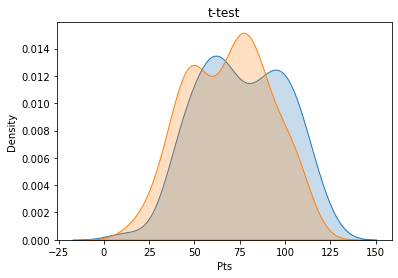

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(bostonBruins.Pts, shade=True)
sns.kdeplot(Blackhawks.Pts, shade=True)
plt.title("t-test amb reserarchpy")

Interpretació:

Els Boston Bruins tenen una puntuació mitja de 75.966 (70.835,	81.096) i és estadisticament més gran que les dades dels Chicago Black Hawks, amb unes dades de 68.541	(63.622, 73.461);  **t(170)** = 2.076, **p**= 0.0394.

# Exercici 3 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%

Ara faré l'anàlisi de tres grups de dades, analitzarem la relació entre els Boston Bruins, Chicago Balck Hawks i els New York Yankies.
Per fer-ho necessitarem un test q ens permeti comprar les dades de més de dos conjunts, i per això faré servir ANOVA.

Per tal de fer un test ANOVA, el primer pas és agrupar les dades de manera que tinguem una columna amb els noms de les variables i una altre amb els valors. En quest cas, les nostres dades ja són distribuides d'aquesta manera, per tant evitarem aquest pas. El que sí faré,es aïllar només les variables a estudiar en un nou DataFrame.
Ho he fet de dues manres diferents:

Opció 1

In [49]:
df2 = df.loc[(df.name == 'Boston Bruins') | (df.name == 'Chicago Blackhawks') | (df.name == 'New York Rangers')]
df2.dropna()

,name,Pts
125,Boston Bruins,12
137,Boston Bruins,38
150,Boston Bruins,45
151,Chicago Blackhawks,41
156,New York Rangers,56
...,...,...
1466,Chicago Blackhawks,97
1478,New York Rangers,93
1490,Boston Bruins,102
1495,Chicago Blackhawks,101


In [120]:
groups = df2.groupby('name').groups

x = groups["Boston Bruins"]
y = groups["New York Rangers"]
z = groups["Chicago Blackhawks"]

stats.f_oneway(x,y,z)

F_onewayResult(statistic=0.05921418059667321, pvalue=0.9425178880470313)

Text(0.5, 1.0, 'Anova')

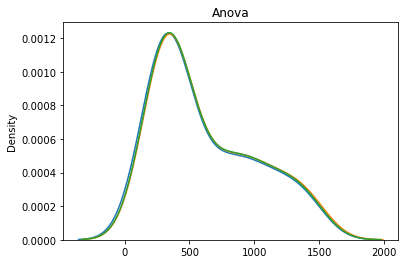

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x)
sns.kdeplot(y)
sns.kdeplot(z)
plt.title("Anova1")


En aquest cas, només comptem amb les dades introduïdes, perdent per l'estudi els anys en que no van participar o no tenim dades.

Opció 2:


In [83]:
df3 = pd.read_csv('dades/Teams.csv', usecols=['year','name','Pts'] )
df3 = pd.DataFrame(df3[['year','name','Pts']])
df3.loc[(df3.name == 'Chicago Black Hawks'), 'name'] = 'Chicago Blackhawks'

df3 = df3.loc[(df3.name == 'Boston Bruins') | (df3.name == 'Chicago Blackhawks') | (df3.name == 'New York Rangers')]
df3.head()

,year,name,Pts
125,1924,Boston Bruins,12
137,1925,Boston Bruins,38
150,1926,Boston Bruins,45
151,1926,Chicago Blackhawks,41
156,1926,New York Rangers,56


In [84]:
df3 = df3.pivot_table(index='year', columns='name', values='Pts',fill_value=0 )

df3.head(3)

name,Boston Bruins,Chicago Blackhawks,New York Rangers
year,,,
1924,12,0,0
1925,38,0,0
1926,45,41,56


In [118]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df3['Boston Bruins'], df3['Chicago Blackhawks'], df3['New York Rangers'])
print('f_value: ', fvalue.round(3),'p-value: ', pvalue.round(3))



f_value:  3.499 p-value:  0.032


Text(0.5, 1.0, 'Anova2')

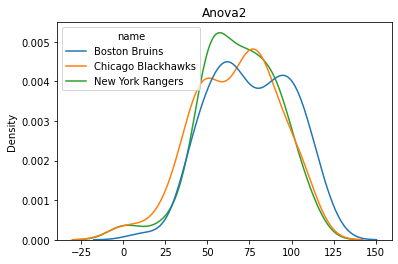

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data = df3)
plt.title("Anova2")

Malgrat les diferencies entre les tres equips, no veiem una diferència significativa entre les mitjanes aritmètiques.